In [60]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('age_gender.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
df.shape

(23705, 5)

In [5]:
df.age.unique()

array([  1,  10, 100, 101, 103, 105,  11, 110, 111, 115, 116,  12,  13,
        14,  15,  16,  17,  18,  19,   2,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,   3,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,   4,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         5,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,   6,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,   7,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,   8,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,   9,  90,  91,  92,  93,  95,  96,  99],
      dtype=int64)

In [6]:
df.gender.unique()

array([0, 1], dtype=int64)

In [7]:
df.ethnicity.unique()

array([2, 3, 4, 0, 1], dtype=int64)

In [8]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


From the upword data we can say that we need to normalize the age column

In [9]:
df.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [10]:
df.duplicated().sum()

0

# **I can see from the upword data that i need to make One hot encoding to the column ethnicity**

In [62]:
df = pd.get_dummies(df , columns=['ethnicity'])


In [63]:
df

,age,gender,img_name,pixels,ethnicity_0,ethnicity_1,ethnicity_2,ethnicity_3,ethnicity_4
0,1,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,False,False,True,False,False
1,1,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,False,False,True,False,False
2,1,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,False,False,True,False,False
3,1,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...,False,False,True,False,False
4,1,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
23700,99,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...,True,False,False,False,False
23701,99,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...,False,True,False,False,False
23702,99,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...,False,False,True,False,False
23703,99,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...,False,False,True,False,False


In [64]:
colus = df.columns.tolist()
colus

['age',
 'gender',
 'img_name',
 'pixels',
 'ethnicity_0',
 'ethnicity_1',
 'ethnicity_2',
 'ethnicity_3',
 'ethnicity_4']

In [65]:
df = df[colus[:2] + colus[4:] + colus[2:4]]
df

,age,gender,ethnicity_0,ethnicity_1,ethnicity_2,ethnicity_3,ethnicity_4,img_name,pixels
0,1,0,False,False,True,False,False,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,0,False,False,True,False,False,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,0,False,False,True,False,False,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,0,False,False,True,False,False,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,0,False,False,True,False,False,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...,...,...,...,...
23700,99,1,True,False,False,False,False,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,False,True,False,False,False,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,1,False,False,True,False,False,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,1,False,False,True,False,False,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [15]:
df['age'].nunique()

104

# **Let's Explore How Our features act together **

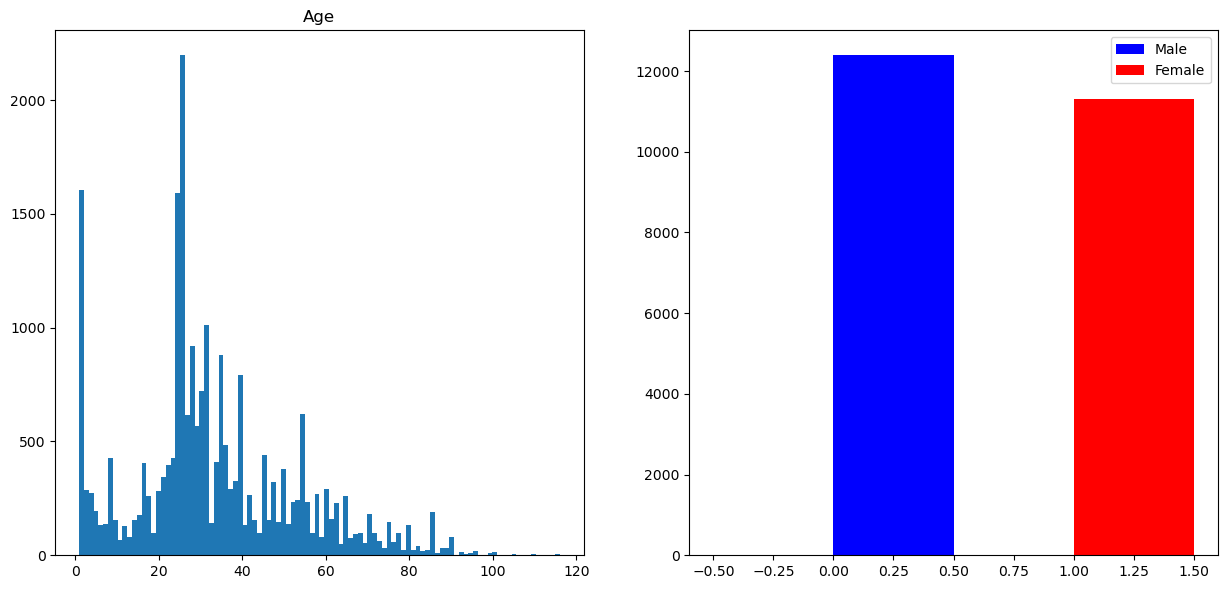

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.hist(df['age'] , bins = 100)
plt.title('Age')

data = df['gender']

men = data[data == 0]
women = data[data == 1]

plt.subplot(2,2,2)
plt.hist(men , bins = 2 , color = 'b' , label = 'Male')
plt.hist(women , bins = 2 , color = 'r' , label = 'Female')
plt.legend()



In [67]:
import cv2
def image_proc(imag_pix , target_size = (244 , 244)):

  im = np.fromstring(imag_pix , sep = ' ').reshape(48,48)
  im = cv2.resize(im , target_size)
  im = im/255


  return im

In [68]:
df['pixels'] = df['pixels'].apply(image_proc)

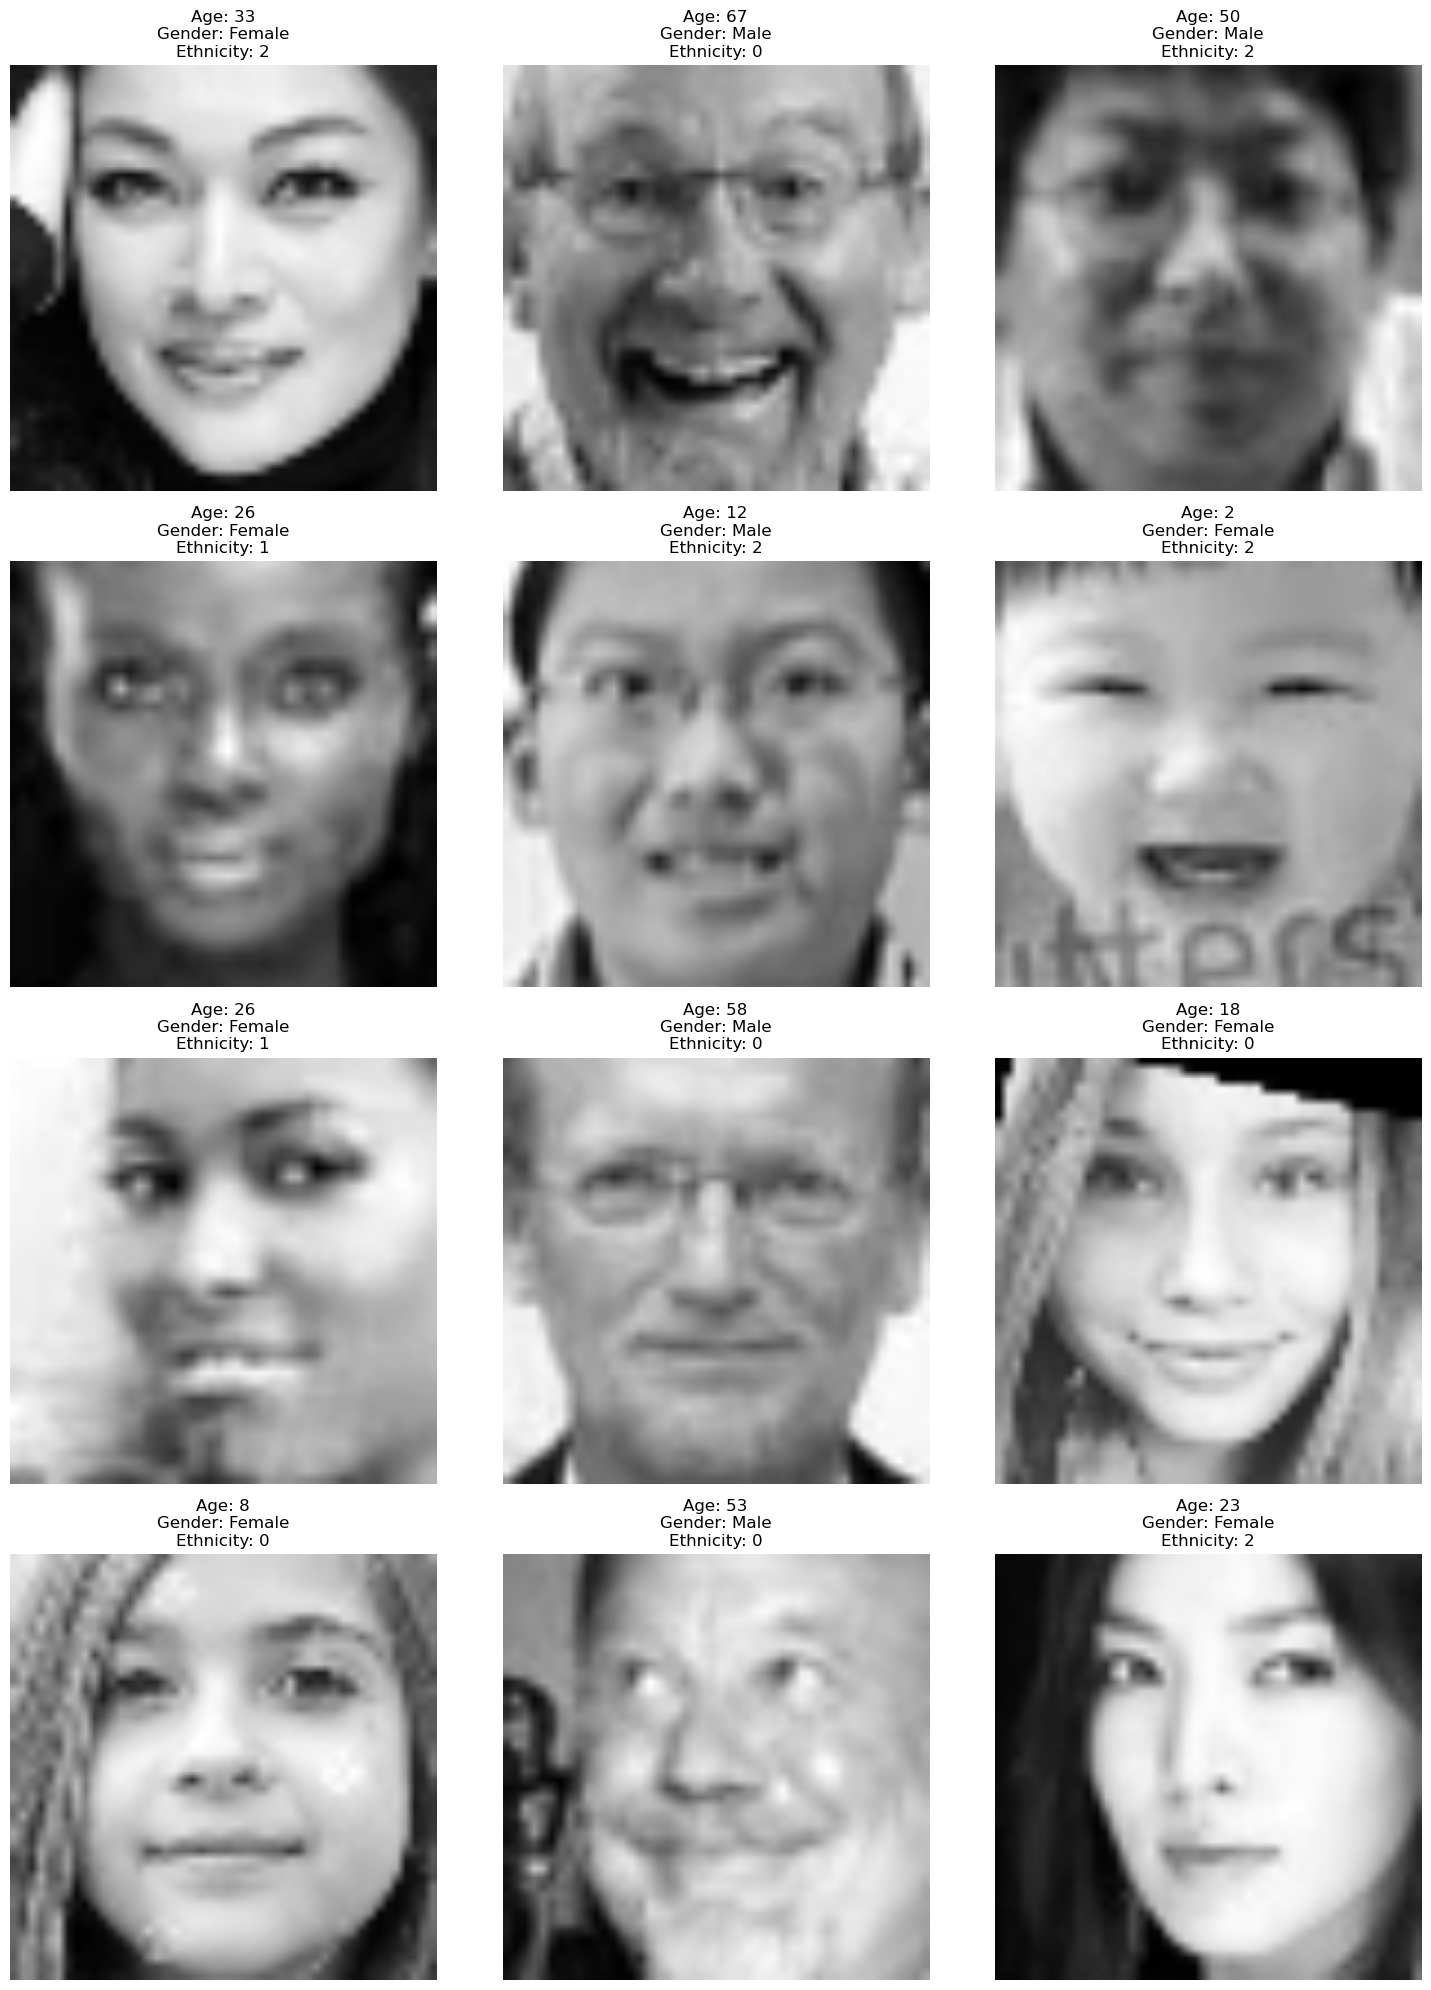

In [69]:
import matplotlib.pyplot as plt

def display_sample(df, sample_size=12):
    sample_df = df.sample(sample_size)
    fig = plt.figure()
    fig.set_size_inches(15, 20)
    axes = fig.subplots(4, 3).reshape(4, 3)

    for i, (idx, row) in enumerate(sample_df.iterrows()):
        image = row['pixels']
        age = row['age']
        gender = row['gender']
        ethnicity = [k for k in df.columns if k.startswith('ethnicity_') and row[k] == 1][0].split('_')[1]

        ax = axes[i // 3, i % 3]
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Age: {age}\nGender: {"Male" if gender == 0 else "Female"}\nEthnicity: {ethnicity}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display Sample Data
display_sample(df, sample_size=12)


In [14]:
data = df['gender']

data



0        0
1        0
2        0
3        0
4        0
        ..
23700    1
23701    1
23702    1
23703    1
23704    1
Name: gender, Length: 23705, dtype: int64

In [46]:
!pip install opencv-python

In [39]:
pixels = np.array([np.fromstring(p, sep=' ') for p in df['pixels']])
pixels = pixels.reshape(-1, 48, 48, 1).astype('float32') / 255.0  


In [40]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

df['age'] = sc.fit_transform(df[['age']])
df

,age,gender,ethnicity_0,ethnicity_1,ethnicity_2,ethnicity_3,ethnicity_4,img_name,pixels
0,0.000000,0,False,False,True,False,False,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,0.000000,0,False,False,True,False,False,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,0.000000,0,False,False,True,False,False,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,0.000000,0,False,False,True,False,False,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,0.000000,0,False,False,True,False,False,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...,...,...,...,...
23700,0.852174,1,True,False,False,False,False,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,0.852174,1,False,True,False,False,False,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,0.852174,1,False,False,True,False,False,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,0.852174,1,False,False,True,False,False,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [41]:
df = df.drop(columns = 'img_name')

In [43]:
from sklearn.model_selection import train_test_split
import tensorflow as tf


age_labels = df['age'].values
gender_labels = df['gender'].values
ethnicity_labels = df[['ethnicity_0', 'ethnicity_1', 'ethnicity_2', 'ethnicity_3', 'ethnicity_4']].values

X_train, X_test, age_train, age_test, gender_train, gender_test, ethnicity_train, ethnicity_test = train_test_split(
    pixels, age_labels, gender_labels, ethnicity_labels, test_size=0.2, random_state=42)



In [44]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, (age_train, gender_train, ethnicity_train)))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, (age_test, gender_test, ethnicity_test)))

def prepare(ds, shuffle=False, augment=False):
    if shuffle:
        ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

train_ds = prepare(train_ds, shuffle=True)
test_ds = prepare(test_ds)


In [45]:
import tensorflow as tf
from tensorflow.keras import layers, Model

input_shape = (48, 48, 1)
inputs = tf.keras.Input(shape=input_shape)

x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

last_output = layers.Dense(128, activation='relu')(x)

gender_output = layers.Dense(1, activation='sigmoid', name='gender_output')(last_output)

num_ethnicities = 5  
ethnicity_output = layers.Dense(num_ethnicities, activation='softmax', name='ethnicity_output')(last_output)

age_output = layers.Dense(1, name='age_output')(last_output)

model = Model(inputs=inputs, outputs=[age_output, gender_output, ethnicity_output])

model.compile(optimizer='adam', 
              loss={'age_output': 'mse', 'gender_output': 'binary_crossentropy', 'ethnicity_output': 'categorical_crossentropy'}, 
              metrics={'age_output': 'mae', 'gender_output': 'accuracy', 'ethnicity_output': 'accuracy'})


In [46]:
# Train the model
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=test_ds)

# Evaluate the model
results = model.evaluate(test_ds)

Epoch 1/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - age_output_mae: 0.1470 - ethnicity_output_accuracy: 0.4228 - gender_output_accuracy: 0.5417 - loss: 2.1537 - val_age_output_mae: 0.1132 - val_ethnicity_output_accuracy: 0.5560 - val_gender_output_accuracy: 0.7585 - val_loss: 1.7036
Epoch 2/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - age_output_mae: 0.1273 - ethnicity_output_accuracy: 0.5472 - gender_output_accuracy: 0.7598 - loss: 1.7148 - val_age_output_mae: 0.1119 - val_ethnicity_output_accuracy: 0.6570 - val_gender_output_accuracy: 0.8260 - val_loss: 1.3675
Epoch 3/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - age_output_mae: 0.1231 - ethnicity_output_accuracy: 0.6215 - gender_output_accuracy: 0.8024 - loss: 1.4642 - val_age_output_mae: 0.1162 - val_ethnicity_output_accuracy: 0.6813 - val_gender_output_accuracy: 0.8412 - val_loss: 1.2628
Epoch 4/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - age_output_mae: 0.1227 - ethnicity_output_accuracy: 0.6593 - gender_output_accuracy: 0.8

IndexError: list index out of range

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


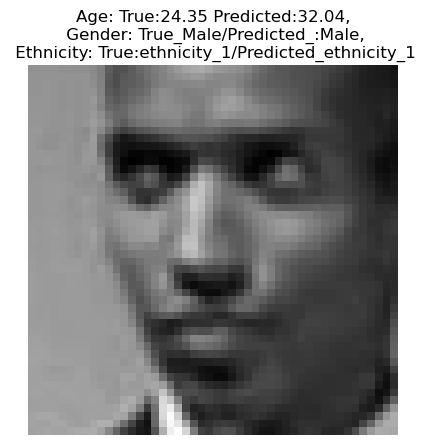

In [71]:
import matplotlib.pyplot as plt
import random

def visualize_random_sample(test_ds, model):
    # Choose a random sample from the test dataset
    random_index = random.randint(0, len(X_test) - 1)
    sample_image = X_test[random_index]
    sample_image_expanded = np.expand_dims(sample_image, axis=0)  # Expand dimensions for model prediction

    # Get the true values
    true_age = age_test[random_index]
    true_gender = gender_test[random_index]
    true_ethnicity = np.argmax(ethnicity_test[random_index])

    # Get the model's predictions
    pred_age, pred_gender, pred_ethnicity = model.predict(sample_image_expanded)
    pred_age = pred_age[0][0]
    pred_gender = 'Female' if pred_gender[0][0] >= 0.5 else 'Male'
    pred_ethnicity = np.argmax(pred_ethnicity)

    # Map the ethnicity predictions back to the original labels
    ethnicity_mapping = {0: 'ethnicity_0', 1: 'ethnicity_1', 2: 'ethnicity_2', 3: 'ethnicity_3', 4: 'ethnicity_4'}
    true_ethnicity_label = ethnicity_mapping[true_ethnicity]
    pred_ethnicity_label = ethnicity_mapping[pred_ethnicity]

    # Plot the image
    plt.imshow(sample_image.squeeze(), cmap='gray')
    plt.title(f'Age: True:{true_age*100:.2f} Predicted:{pred_age*100:.2f},\n Gender: True_{"Male" if true_gender == 0 else "Female"}/Predicted_:{pred_gender},\n Ethnicity: True:{true_ethnicity_label}/Predicted_{pred_ethnicity_label}')
    plt.axis('off')
    plt.show()

# Call the function
visualize_random_sample(test_ds, model)
